# Hyperparameters Database - Melbourne Housing Market

# Abstract

In every algorithm there are parameters and hyperparameters. A model parameter is a configuration variable that is internal to the model and whose value can be estimated from the given data. They are required by the models to make predictions.
A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data. They are usually using heuristics for a given predictive model. The goal of this skunkworks project is to find the best hyperparameters for the models which were given by running H2O AutoML and create a database by running millions of hyperparameter values, over thousands of datasets and calculating the individual conditional expectation of every hyperparameter on the quality of a model. The objective is to create a database which has algorithms, tools and data that allows users to choose hyperparameters that maximize the predictive power of their respective models.

# Dataset

The original dataset for Melbourne Housing Market can be found on https://www.kaggle.com/anthonypino/melbourne-housing-market#Melbourne_housing_FULL.csv. From this datset we can find a trend or give a prediction for which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? This dataset consists of several features from which we make use to predict the prices of houses.

#### Features in our dataset:

1. Suburb: Suburb

2. Address: Address

3. Rooms: Number of rooms

4. Price: Price in Australian dollars

5. Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not     disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction       price not disclosed. N/A - price or highest bid not available.

6. Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; 
  o res - other residential.

7. SellerG: Real Estate Agent

8. Date: Date sold

9. Distance: Distance from CBD in Kilometres

10. Regionname: General Region (West, North West, North, North east ...etc)

11. Propertycount: Number of properties that exist in the suburb.

12. Bedroom2 : Scraped # of Bedrooms (from different source)

13. Bathroom: Number of Bathrooms

14. Car: Number of carspots

15. Landsize: Land Size in Metres

16. BuildingArea: Building Size in Metres

17. YearBuilt: Year the house was built

18. CouncilArea: Governing council for the area

#### Aim of the project:

1. Identify the type of dataset - Regression/Classification(Regression is our dataset type)
2. Perform data cleaning and pre-processing
3. Run H2O to get the models for different run times
4. Get the leaderboard and save all models on leaderboard in json files for all 5 run times
5. Save metadata for each run time
6. Extract and save parameters of all models for every run time
7. Find the important hyperparameters for models
8. Find the range of hyperparameters for models
9. Compare the range of values across the models for different hyperparameters

In [182]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

#### Loading the dataset

In [184]:
df = pd.read_csv('D:\DATASCIENCE\My Practice\Melbourne_housing_FULL.csv')

#### Viewing our dataset

In [185]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [53]:
#Printing object columns
print(df.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [54]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

In [55]:
#Converting object columns to categories
for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In [56]:
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
num_cats = ['Postcode']  

for colname in num_cats:
    df[colname] = df[colname].astype('category')   

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1)

#### Viewing correlation between all variables

Text(0.5, 1.0, 'Variable Correlation')

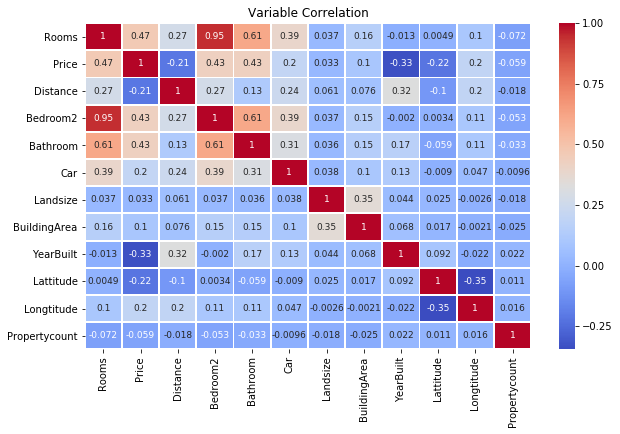

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [59]:
df['RoomsBedroom2'] = df['Rooms'] - df['Bedroom2']
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,RoomsBedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,0.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,1.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0,1.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5,3067.0,...,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0,-2.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5,3067.0,...,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0,-1.0


#### Dropping the Bedroom2 column as Rooms and Bedroom2 have same values and correlation between them is also very high

In [60]:
df = df.drop(columns = ['RoomsBedroom2','Bedroom2'])

#### Checking for null values

In [61]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### Dropping the rows which has price values as null

In [62]:
df = df.dropna(subset=['Price'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 20 columns):
Suburb           27247 non-null category
Address          27247 non-null category
Rooms            27247 non-null int64
Type             27247 non-null category
Price            27247 non-null float64
Method           27247 non-null category
SellerG          27247 non-null category
Date             27247 non-null datetime64[ns]
Distance         27246 non-null float64
Postcode         27246 non-null category
Bathroom         20800 non-null float64
Car              20423 non-null float64
Landsize         17982 non-null float64
BuildingArea     10656 non-null float64
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null category
Lattitude        20993 non-null float64
Longtitude       20993 non-null float64
Regionname       27244 non-null category
Propertycount    27244 non-null float64
dtypes: category(8), datetime64[ns](1), float64(10), int64(1)
memory usage: 4.

#### Dropping the rows in which Distance, Postcode, CouncilArea, Regionname, Propertycount have null values as they have 2 null values in their column and also converting data datatype to datetime

In [64]:
df = df.dropna(subset=['Distance','Postcode','CouncilArea','Regionname','Propertycount'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 20 columns):
Suburb           27244 non-null category
Address          27244 non-null category
Rooms            27244 non-null int64
Type             27244 non-null category
Price            27244 non-null float64
Method           27244 non-null category
SellerG          27244 non-null category
Date             27244 non-null datetime64[ns]
Distance         27244 non-null float64
Postcode         27244 non-null category
Bathroom         20800 non-null float64
Car              20423 non-null float64
Landsize         17982 non-null float64
BuildingArea     10656 non-null float64
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null category
Lattitude        20993 non-null float64
Longtitude       20993 non-null float64
Regionname       27244 non-null category
Propertycount    27244 non-null float64
dtypes: category(8), datetime64[ns](1), float64(10), int64(1)
memory usage: 4.

#### Filling the rest of the numeric columns null values with mean

In [65]:
for cols in df.columns:
    if df[cols].isnull().sum() != 0:
        df[cols].fillna((df[cols].mean()), inplace=True)
        
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 20 columns):
Suburb           27244 non-null category
Address          27244 non-null category
Rooms            27244 non-null int64
Type             27244 non-null category
Price            27244 non-null float64
Method           27244 non-null category
SellerG          27244 non-null category
Date             27244 non-null datetime64[ns]
Distance         27244 non-null float64
Postcode         27244 non-null category
Bathroom         27244 non-null float64
Car              27244 non-null float64
Landsize         27244 non-null float64
BuildingArea     27244 non-null float64
YearBuilt        27244 non-null float64
CouncilArea      27244 non-null category
Lattitude        27244 non-null float64
Longtitude       27244 non-null float64
Regionname       27244 non-null category
Propertycount    27244 non-null float64
dtypes: category(8), datetime64[ns](1), float64(10), int64(1)
memory usage: 4.

#### Checking whether BuildingArea or Landsize is zero If zero we remove those rows as without them there is no house

In [67]:
print(df[df['BuildingArea']==0])
print(df[df['Landsize']==0])

                 Suburb              Address  Rooms Type      Price Method  \
7211    North Melbourne         19 Shands La      2    t   841000.0      S   
19775      Balwyn North        14 Wanbrow Av      5    h  1950000.0      S   
19840          Bundoora        22 Moreton Cr      3    h   814000.0      S   
20223     Roxburgh Park       16 Sandover Dr      4    h   570000.0      S   
20262         Thornbury    19/337 Station St      3    t   900000.0     VB   
21155            Elwood        6/31 Beach Av      2    u   735000.0      S   
21561     Sunshine West          5 Comino Rd      5    h   720000.0      S   
21742    Brunswick West     10/13 Peacock St      2    u   461500.0     SP   
21858          Essendon      6/4 Balmoral St      2    u   491000.0      S   
21954               Kew  9/910 Glenferrie Rd      2    u  1005000.0      S   
22040           Prahran        6 Aberdeen Rd      3    h  1390000.0      S   
22507       Huntingdale       33 Beauford St      3    h  120500

[61 rows x 20 columns]
               Suburb                Address  Rooms Type      Price Method  \
17         Abbotsford     6/241 Nicholson St      1    u   300000.0      S   
23         Abbotsford     411/8 Grosvenor St      2    u   700000.0     VB   
25         Abbotsford    123/56 Nicholson St      2    u   750000.0      S   
29         Abbotsford     7/20 Abbotsford St      1    u   441000.0     SP   
40         Abbotsford     13/11 Nicholson St      3    t   900000.0      S   
42         Abbotsford     6/219 Nicholson St      2    u   500000.0      S   
48         Abbotsford     5/20 Abbotsford St      1    u   426000.0     SP   
50         Abbotsford    116/56 Nicholson St      1    u   457000.0      S   
53         Abbotsford           31 Turner St      4    h  1542000.0      S   
57         Abbotsford        11/205 Gipps St      1    u   470000.0      S   
67       Airport West          50 Bedford St      3    h   730000.0     VB   
68       Airport West          50 Bedford

[1942 rows x 20 columns]


In [68]:
df = df[df['BuildingArea']!=0]
df = df[df['Landsize']!=0]

In [69]:
df.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,25241.000000,2.524100e+04,25241.000000,25241.000000,25241.000000,25241.000000,25241.000000,25241.000000,25241.000000,25241.000000,25241.000000
mean,3.070124,1.081375e+06,11.652827,1.618906,1.760671,639.131934,160.254982,1965.985712,-37.805641,144.997394,7513.653738
std,0.925769,6.478327e+05,6.828392,0.612034,0.863154,3166.505912,291.014251,24.450405,0.081988,0.108869,4513.568728
min,1.000000,1.120000e+05,0.000000,0.000000,0.000000,1.000000,1.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.600000e+05,6.900000,1.000000,1.000000,459.000000,156.834586,1966.609153,-37.840320,144.954190,4217.000000
50%,3.000000,9.000000e+05,10.700000,1.591683,1.715370,593.488933,156.834586,1966.609153,-37.806963,144.996711,6543.000000
75%,4.000000,1.317000e+06,14.300000,2.000000,2.000000,605.000000,156.834586,1966.609153,-37.763400,145.051750,10331.000000
max,16.000000,1.120000e+07,48.100000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


#### Looking at the distribution of price data

C:\Users\venu0\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


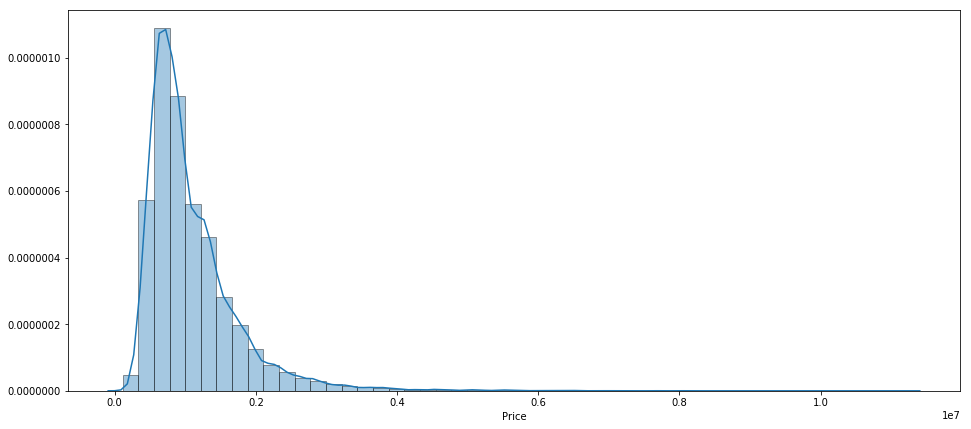

In [70]:
plt.figure(figsize=(16,7))
sns.distplot(df['Price'], kde = True,hist_kws=dict(edgecolor="k"))

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
x = ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']
y = 'Price'

#### Loading DRF model's hyperparameter values for all runtimes including its metrics

In [76]:
dfdrf = pd.read_csv("DRF_new.csv")

In [77]:
dfdrf

,Model_Name,weights_column,offset_column,fold_column,fold_assignment,stopping_rounds,max_runtime_secs,stopping_metric,stopping_tolerance,balance_classes,...,seed,sample_rate,sample_rate_per_class,col_sample_rate_per_tree,col_sample_rate_change_per_level,min_split_improvement,histogram_type,mtries,categorical_encoding,RMSE
0,DRF_1_AutoML_20190416_233703,NaN,NaN,NaN,Modulo,0,0,AUTO,0.007022,False,...,-6.700000e+18,0.632,NaN,1,1,0.00001,AUTO,-1,AUTO,312601.3374
1,DRF_1_AutoML_20190417_103626,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,6.960000e+18,0.632,NaN,1,1,0.00001,AUTO,-1,AUTO,311943.2465
2,DRF_1_AutoML_20190417_092107,NaN,NaN,NaN,Modulo,0,0,AUTO,0.007022,False,...,-2.640000e+18,0.632,NaN,1,1,0.00001,AUTO,-1,AUTO,312521.6141
3,DRF_1_AutoML_20190417_121910,NaN,NaN,NaN,Modulo,0,0,AUTO,0.007022,False,...,-9.110000e+18,0.632,NaN,1,1,0.00001,AUTO,-1,AUTO,312285.2128
4,DRF_1_AutoML_20190419_190006,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,-8.630000e+18,0.632,NaN,1,1,0.00001,AUTO,-1,AUTO,313819.7682
5,DRF_1_AutoML_20190419_193106,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,5.020000e+18,0.632,NaN,1,1,0.00001,AUTO,-1,AUTO,316050.9626


In [78]:
dfdrf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 28 columns):
Model_Name                          6 non-null object
weights_column                      0 non-null float64
offset_column                       0 non-null float64
fold_column                         0 non-null float64
fold_assignment                     6 non-null object
stopping_rounds                     6 non-null int64
max_runtime_secs                    6 non-null int64
stopping_metric                     6 non-null object
stopping_tolerance                  6 non-null float64
balance_classes                     6 non-null bool
class_sampling_factors              0 non-null float64
max_after_balance_size              6 non-null int64
ntrees                              6 non-null int64
max_depth                           6 non-null int64
min_rows                            6 non-null int64
nbins                               6 non-null int64
nbins_top_level                     6 n

#### Dropping the columns having all null values

In [79]:
dfdrf = dfdrf.drop(columns=['weights_column','offset_column','fold_column','class_sampling_factors','sample_rate_per_class'])

#### Finding the range of hyperparameters for all DRF models

In [142]:
print("stopping_tolerance :" , set(dfdrf.stopping_tolerance))
print("fold_assignment :" , set(dfdrf.fold_assignment))
print("max_after_balance_size:", set(dfdrf.max_after_balance_size))
print("Ntrees :",set(dfdrf.ntrees))
print("max_depth :",set(dfdrf.max_depth))
print("stopping_metric :",set(dfdrf.stopping_metric))
print("stopping_rounds :",set(dfdrf.stopping_rounds))
print("balance_classes :",set(dfdrf.balance_classes))
print("min_rows :",set(dfdrf.min_rows))
print("nbins :",set(dfdrf.nbins))
print("nbins_top_level :",set(dfdrf.nbins_top_level))
print("nbins_cats :",set(dfdrf.nbins_cats))   
print("categorical encoding:",set(dfdrf.categorical_encoding))
print("seed :",set(dfdrf.seed))
print("sample_rate :",set(dfdrf.sample_rate))
print("col_sample_rate_per_tree :",set(dfdrf.col_sample_rate_per_tree))
print("col_sample_rate_change_per_level :",set(dfdrf.col_sample_rate_change_per_level))
print("min_split_improvement :",set(dfdrf.min_split_improvement))
print("histogram_type :",set(dfdrf.histogram_type))
print("mtries :",set(dfdrf.mtries))

stopping_tolerance : {0.007021565}
fold_assignment : {'Modulo'}
max_after_balance_size: {5}
Ntrees : {35, 50, 43}
max_depth : {20}
stopping_metric : {'deviance', 'AUTO'}
stopping_rounds : {0}
balance_classes : {False}
min_rows : {1}
nbins : {20}
nbins_top_level : {1024}
nbins_cats : {1024}
categorical encoding: {'AUTO'}
seed : {5.02e+18, 6.96e+18, -9.11e+18, -8.63e+18, -6.7e+18, -2.64e+18}
sample_rate : {0.632000029}
col_sample_rate_per_tree : {1}
col_sample_rate_change_per_level : {1}
min_split_improvement : {1e-05}
histogram_type : {'AUTO'}
mtries : {-1}


#### ScatterPlot for the hyperparameters versus metric

C:\Users\venu0\Anaconda3\lib\site-packages\numpy\lib\histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


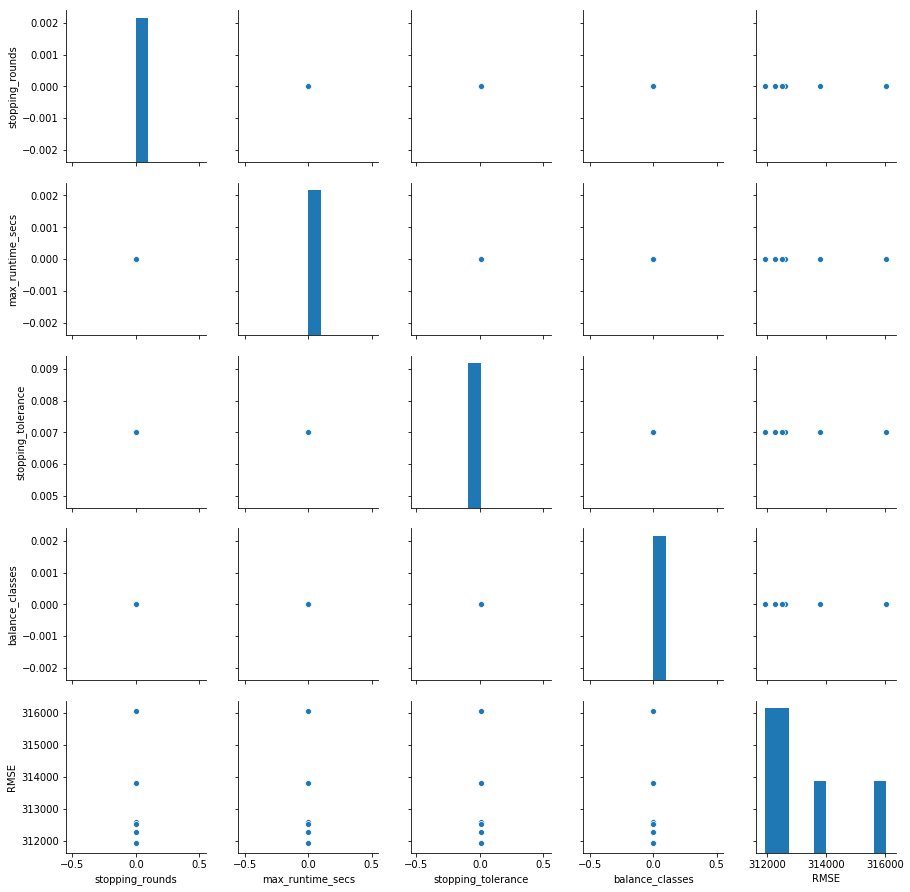

In [102]:
x = dfdrf[['Model_Name', 'fold_assignment', 'stopping_rounds', 'max_runtime_secs',
       'stopping_metric', 'stopping_tolerance', 'balance_classes','RMSE']]
sns.pairplot(x)

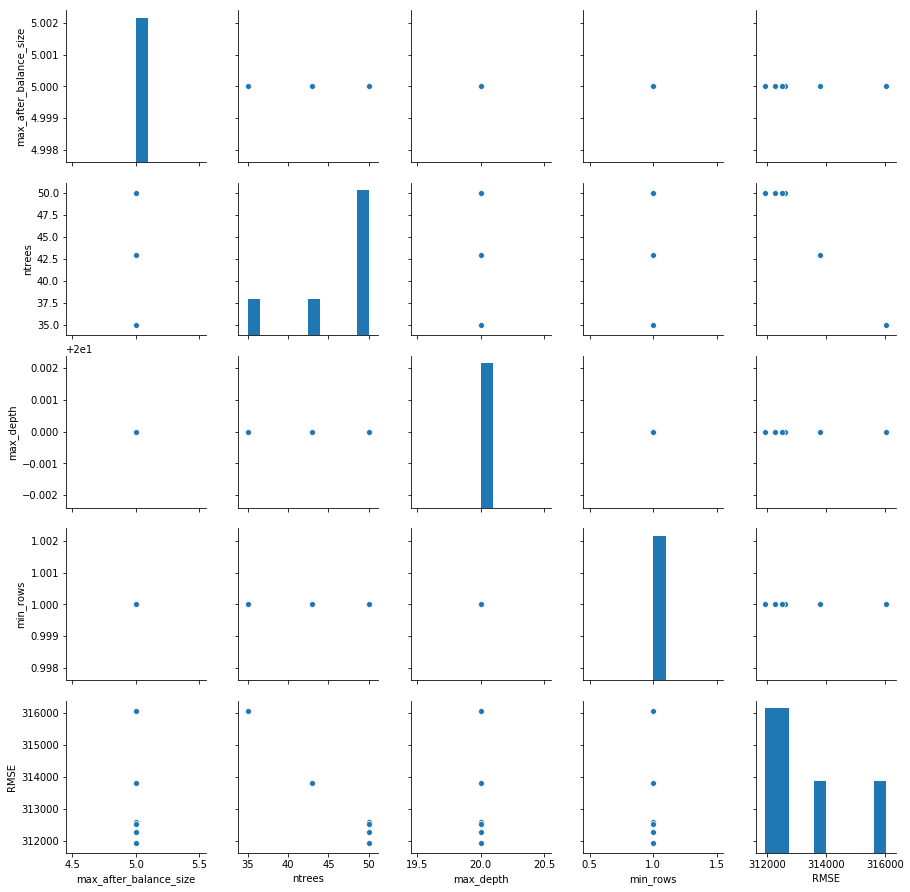

In [103]:
y = dfdrf[['max_after_balance_size', 'ntrees', 'max_depth', 'min_rows','RMSE']]
sns.pairplot(y)

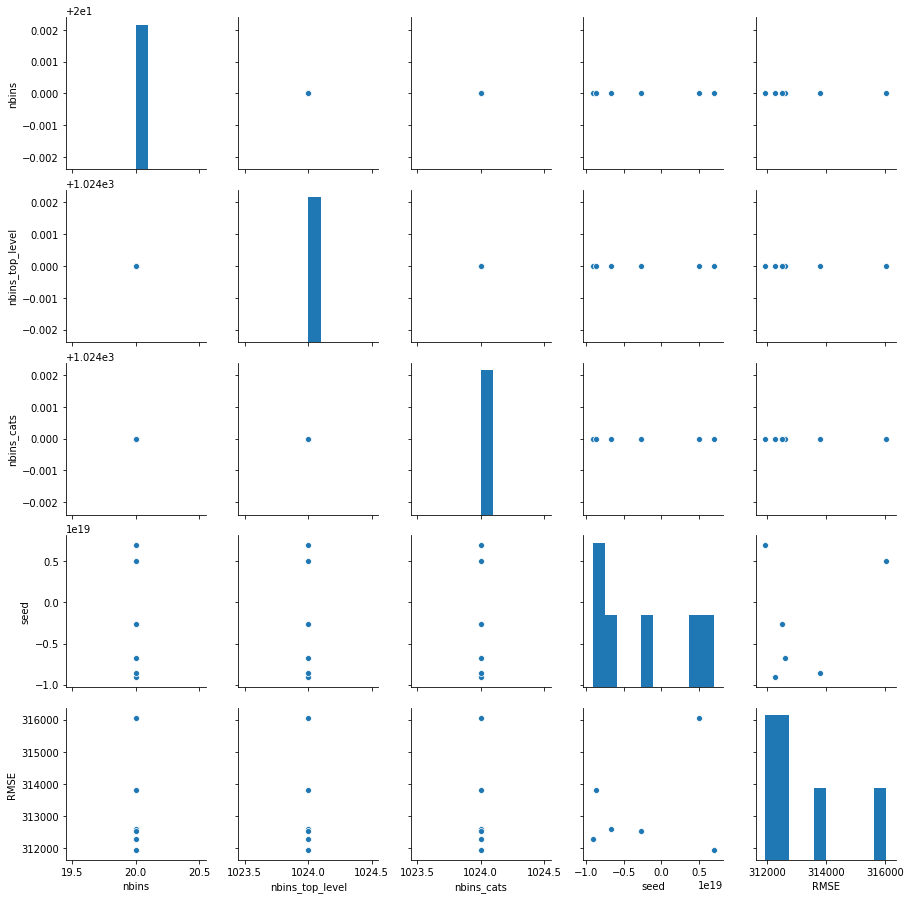

In [104]:
z = dfdrf[['nbins','nbins_top_level', 'nbins_cats', 'seed','RMSE']]
sns.pairplot(z)

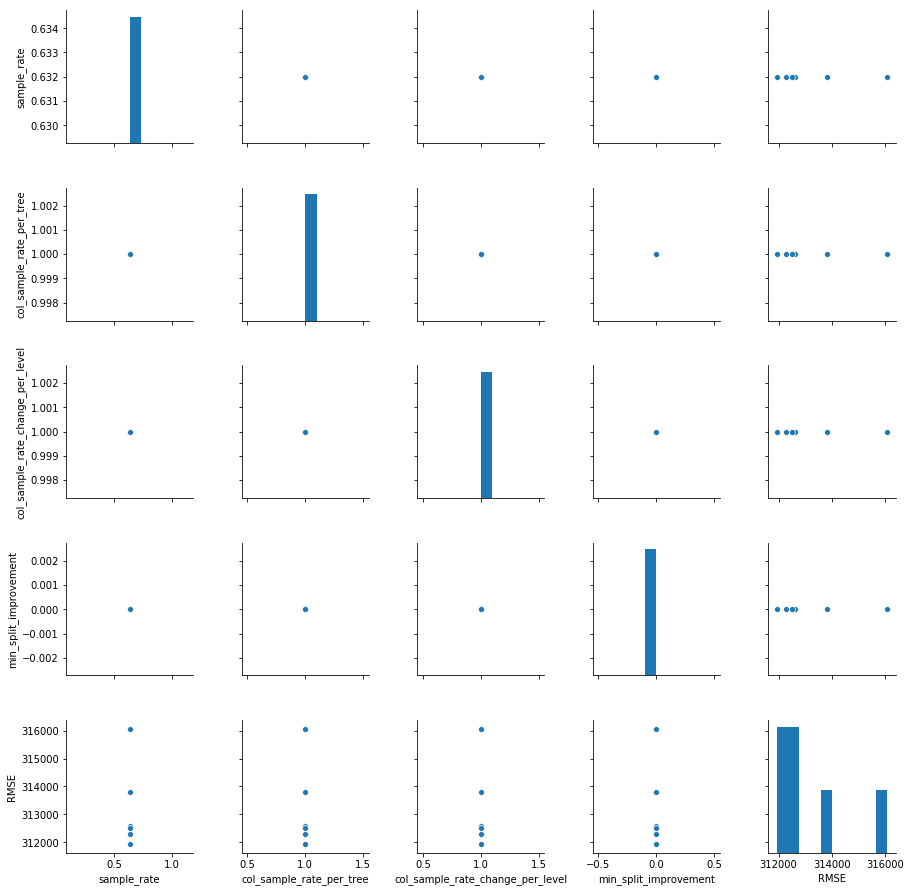

In [105]:
a = dfdrf[['sample_rate','col_sample_rate_per_tree', 'col_sample_rate_change_per_level','min_split_improvement','RMSE']]
sns.pairplot(a)

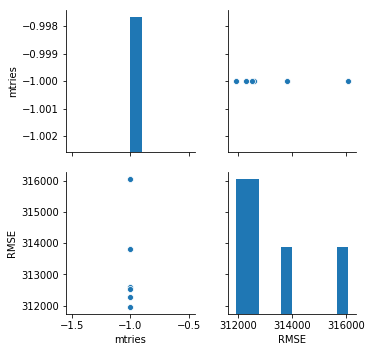

In [106]:
b = dfdrf[['histogram_type', 'mtries','categorical_encoding', 'RMSE']]
sns.pairplot(b)

#### Loading XRT model's hyperparameter values for all runtimes including its metrics

In [143]:
dfxrt = pd.read_csv("XRT_new.csv")

In [84]:
dfxrt

,Model_Name,weights_column,offset_column,fold_column,fold_assignment,stopping_rounds,max_runtime_secs,stopping_metric,stopping_tolerance,balance_classes,...,seed,sample_rate,sample_rate_per_class,col_sample_rate_per_tree,col_sample_rate_change_per_level,min_split_improvement,histogram_type,mtries,categorical_encoding,RMSE
0,XRT_1_AutoML_20190416_233703,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,5.540000e+18,0.632,NaN,1,1,0.00001,Random,-1,AUTO,325689.4257
1,XRT_1_AutoML_20190417_092107,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,-5.340000e+18,0.632,NaN,1,1,0.00001,Random,-1,AUTO,323151.4021
2,XRT_1_AutoML_20190417_103626,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,3.640000e+18,0.632,NaN,1,1,0.00001,Random,-1,AUTO,327050.1947
3,XRT_1_AutoML_20190417_121910,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,2.310000e+17,0.632,NaN,1,1,0.00001,Random,-1,AUTO,329421.3991
4,XRT_1_AutoML_20190419_190006,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,3.540000e+18,0.632,NaN,1,1,0.00001,Random,-1,AUTO,326902.6681
5,XRT_1_AutoML_20190419_193106,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,7.040000e+18,0.632,NaN,1,1,0.00001,Random,-1,AUTO,333680.2598


In [85]:
dfxrt.isnull().sum()

Model_Name                          0
weights_column                      6
offset_column                       6
fold_column                         6
fold_assignment                     0
stopping_rounds                     0
max_runtime_secs                    0
stopping_metric                     0
stopping_tolerance                  0
balance_classes                     0
class_sampling_factors              6
max_after_balance_size              0
ntrees                              0
max_depth                           0
min_rows                            0
nbins                               0
nbins_top_level                     0
nbins_cats                          0
seed                                0
sample_rate                         0
sample_rate_per_class               6
col_sample_rate_per_tree            0
col_sample_rate_change_per_level    0
min_split_improvement               0
histogram_type                      0
mtries                              0
categorical_

In [135]:
dfxrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 23 columns):
Model_Name                          6 non-null object
fold_assignment                     6 non-null object
stopping_rounds                     6 non-null int64
max_runtime_secs                    6 non-null int64
stopping_metric                     6 non-null object
stopping_tolerance                  6 non-null float64
balance_classes                     6 non-null bool
max_after_balance_size              6 non-null int64
ntrees                              6 non-null int64
max_depth                           6 non-null int64
min_rows                            6 non-null int64
nbins                               6 non-null int64
nbins_top_level                     6 non-null int64
nbins_cats                          6 non-null int64
seed                                6 non-null float64
sample_rate                         6 non-null float64
col_sample_rate_per_tree            6 non-n

#### Dropping the columns having all null values

In [86]:
dfxrt = dfxrt.drop(columns=['weights_column','offset_column','fold_column','class_sampling_factors','sample_rate_per_class'])

#### Finding the range of hyperparameters for all XRT models

In [144]:
print("fold_assignment :" , set(dfxrt.fold_assignment))
print("stopping_rounds :" , set(dfxrt.stopping_rounds))
print("max_runtime_secs:", set(dfxrt.max_runtime_secs))
print("stopping_metric :",set(dfxrt.stopping_metric))
print("stopping_tolerance :",set(dfxrt.stopping_tolerance))
print("balance_classes :",set(dfxrt.balance_classes))
print("max_after_balance_size :",set(dfxrt.max_after_balance_size))
print("ntrees :",set(dfxrt.ntrees))
print("max_depth :",set(dfxrt.max_depth))   
print("min_rows :",set(dfxrt.min_rows))
print("nbins :",set(dfxrt.nbins))
print("nbins_top_level :",set(dfxrt.nbins_top_level))
print("nbins_cats :",set(dfxrt.nbins_cats))
print("seed :",set(dfxrt.seed))
print("sample_rate :",set(dfxrt.sample_rate))
print("col_sample_rate_per_tree :",set(dfxrt.col_sample_rate_per_tree))
print("col_sample_rate_change_per_level :",set(dfxrt.col_sample_rate_change_per_level))
print("min_split_improvement :",set(dfxrt.min_split_improvement))
print("histogram_type :",set(dfxrt.histogram_type))
print("mtries :",set(dfxrt.mtries))
print("categorical_encoding :",set(dfxrt.categorical_encoding))

fold_assignment : {'Modulo'}
stopping_rounds : {0}
max_runtime_secs: {0}
stopping_metric : {'deviance'}
stopping_tolerance : {0.007021565}
balance_classes : {False}
max_after_balance_size : {5}
ntrees : {43, 50, 35, 30}
max_depth : {20}
min_rows : {1}
nbins : {20}
nbins_top_level : {1024}
nbins_cats : {1024}
seed : {2.31e+17, 3.64e+18, 5.54e+18, 3.54e+18, 7.04e+18, -5.34e+18}
sample_rate : {0.632000029}
col_sample_rate_per_tree : {1}
col_sample_rate_change_per_level : {1}
min_split_improvement : {1e-05}
histogram_type : {'Random'}
mtries : {-1}
categorical_encoding : {'AUTO'}


#### ScatterPlot for the hyperparameters versus metric

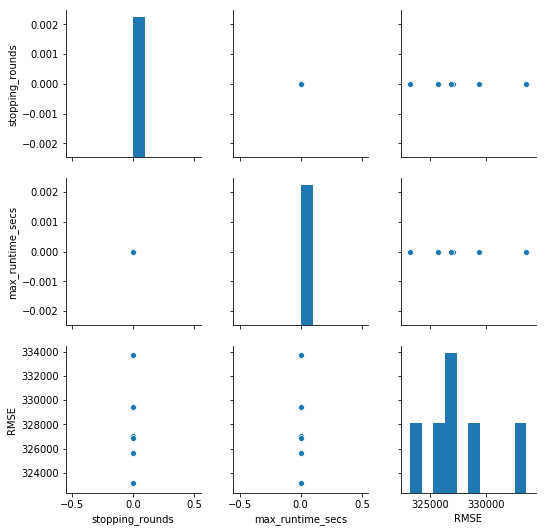

In [107]:
c = dfxrt[['Model_Name', 'fold_assignment', 'stopping_rounds', 'max_runtime_secs','RMSE']]
sns.pairplot(c)

C:\Users\venu0\Anaconda3\lib\site-packages\numpy\lib\histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


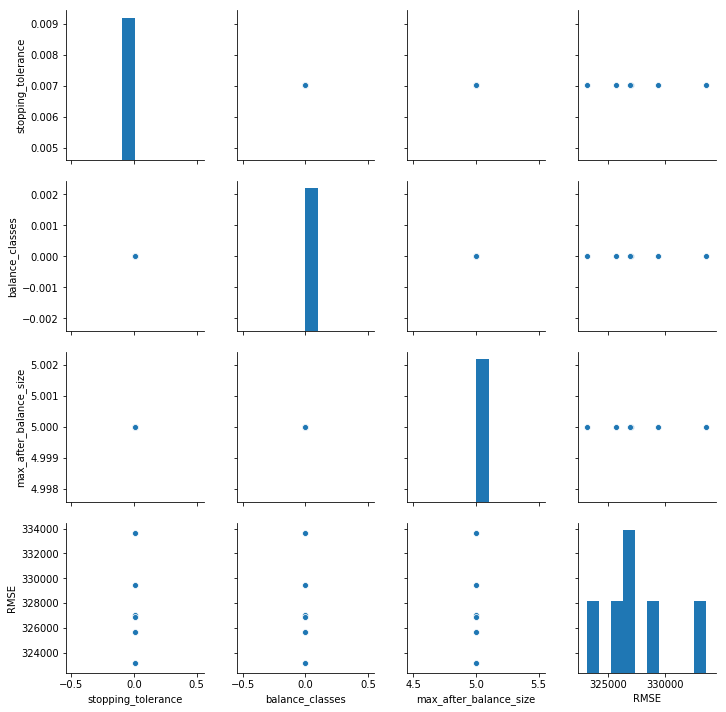

In [108]:
d = dfxrt[['stopping_metric', 'stopping_tolerance', 'balance_classes','max_after_balance_size','RMSE']]
sns.pairplot(d)

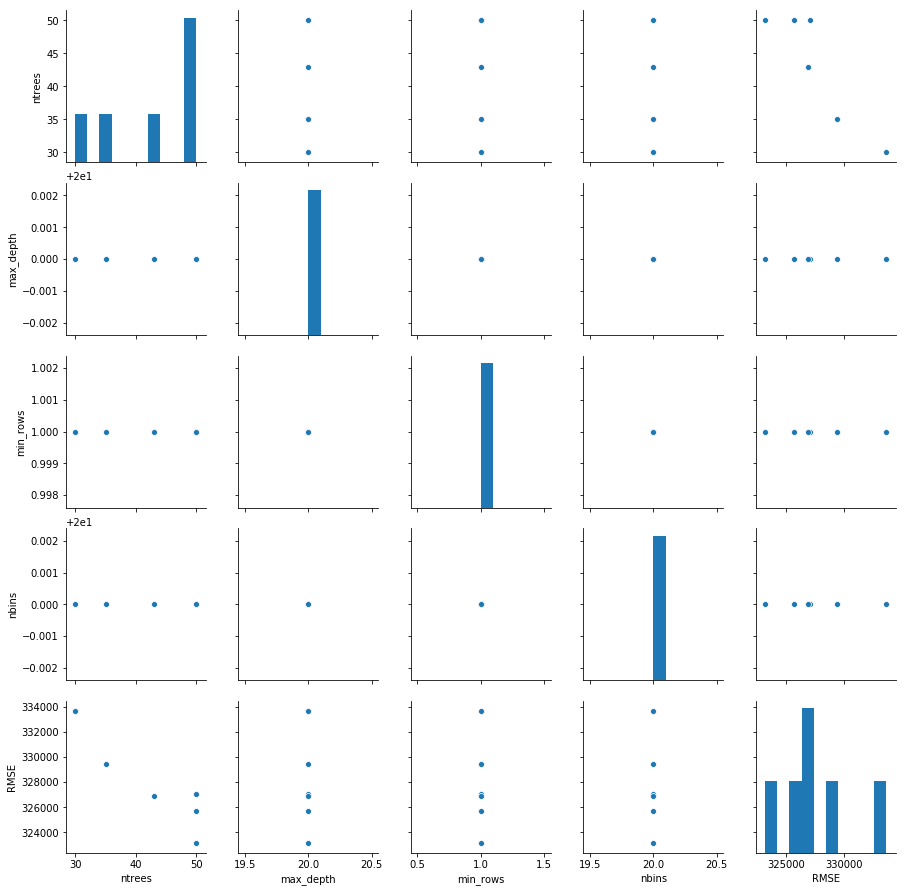

In [109]:
e = dfxrt[['ntrees', 'max_depth', 'min_rows', 'nbins','RMSE']]
sns.pairplot(e)

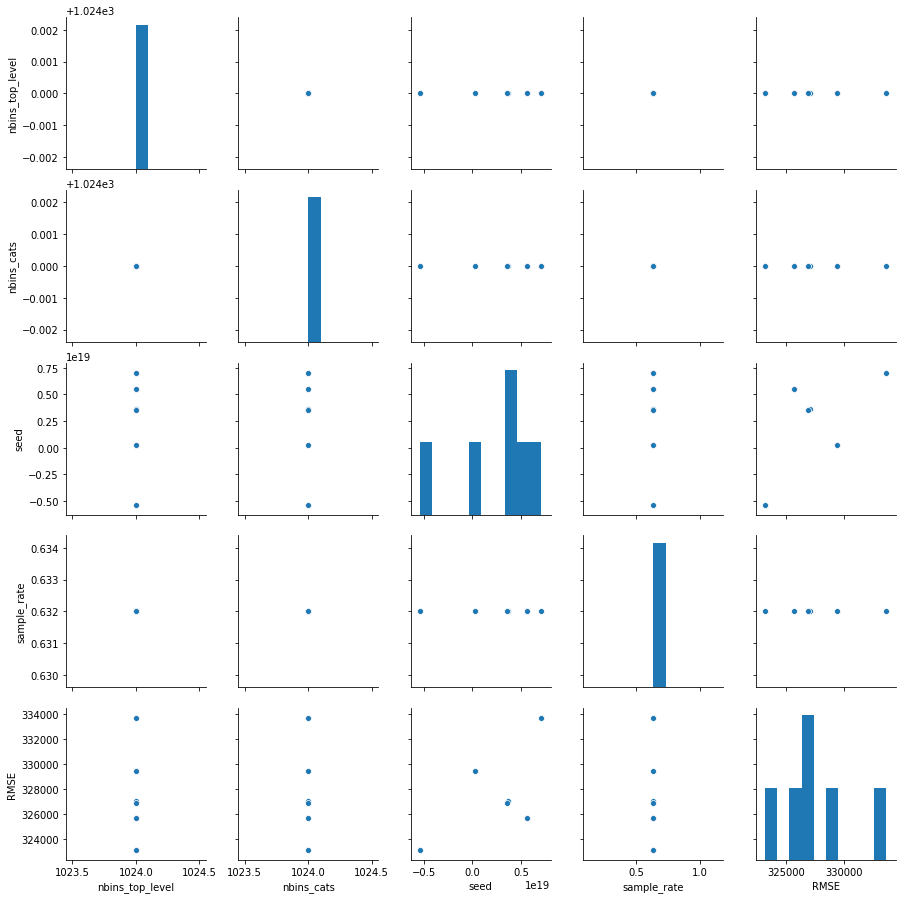

In [110]:
f = dfxrt[['nbins_top_level', 'nbins_cats', 'seed', 'sample_rate','RMSE']]
sns.pairplot(f)

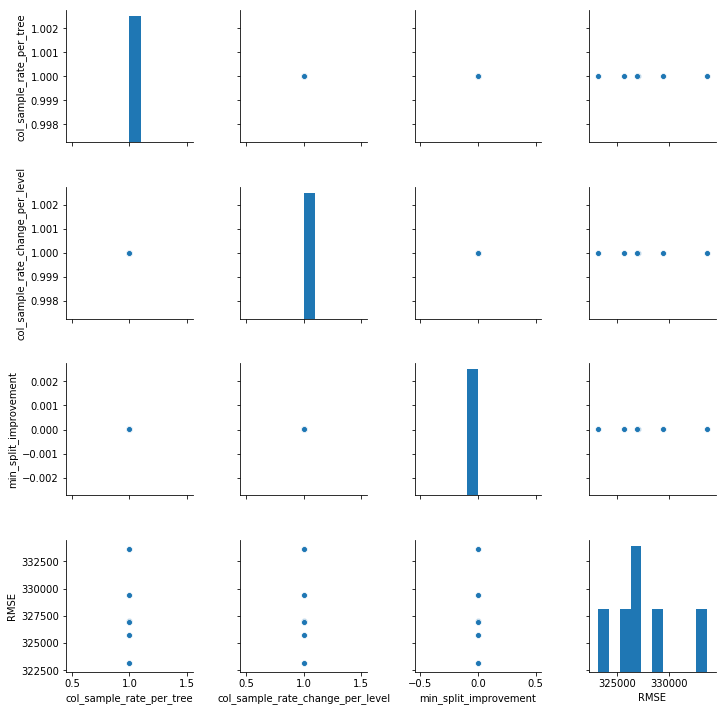

In [111]:
g = dfxrt[['col_sample_rate_per_tree', 'col_sample_rate_change_per_level','min_split_improvement', 'histogram_type','RMSE']]
sns.pairplot(g)

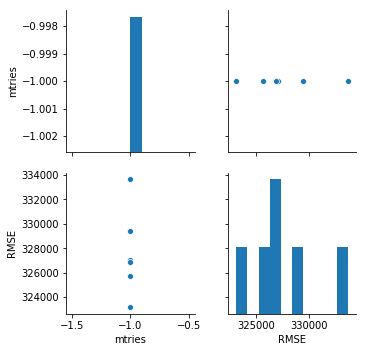

In [112]:
h = dfxrt[['mtries','categorical_encoding', 'RMSE']]
sns.pairplot(h)

# <font size="3">Loading GLM model's hyperparameter values for all runtimes including its metrics</font>

In [91]:
dfglm = pd.read_csv("GLM_new.csv")

In [92]:
dfglm

,Model_Name,weights_column,offset_column,fold_column,fold_assign,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda1,missing_values_handling,standardize,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,rmse
0,GLM_grid_1_AutoML_20190416_233703_model_1,NaN,NaN,NaN,Modulo,3.610000e+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[28044084.4220047, 17415851.54590214, 10815538...",MeanImputation,True,False,5,300,2.83333,651416.0586
1,GLM_grid_1_AutoML_20190417_103626_model_1,NaN,NaN,NaN,Modulo,1.700000e+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[28044084.4220047, 17415851.54590214, 10815538...",MeanImputation,True,False,5,300,8.33333,651416.0586
2,GLM_grid_1_AutoML_20190417_092107_model_1,NaN,NaN,NaN,Modulo,-4.290000e+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[28044084.4220047, 17415851.54590214, 10815538...",MeanImputation,True,False,5,300,8.16666,651416.0586
3,GLM_grid_1_AutoML_20190417_121910_model_1,NaN,NaN,NaN,Modulo,1.410000e+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[28044084.4220047, 17415851.54590214, 10815538...",MeanImputation,True,False,5,300,11.83333,651416.0586
4,GLM_grid_1_AutoML_20190419_190006_model_1,NaN,NaN,NaN,Modulo,2.110000e+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[28044084.4220047, 17415851.54590214, 10815538...",MeanImputation,True,False,5,300,0.00000,651416.0586
5,GLM_grid_1_AutoML_20190419_193106_model_1,NaN,NaN,NaN,Modulo,-3.120000e+17,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[28044084.4220047, 17415851.54590214, 10815538...",MeanImputation,True,False,5,300,0.00000,651416.0586


In [93]:
dfglm.isnull().sum()

Model_Name                 0
weights_column             6
offset_column              6
fold_column                6
fold_assign                0
seed                       0
tweedie_variance_power     0
tweedie_link_power         0
alpha                      0
lambda1                    0
missing_values_handling    0
standardize                0
balance_classes            0
max_after_balance_size     0
max_iterations             0
max_runtime_secs           0
rmse                       0
dtype: int64

In [137]:
dfglm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
Model_Name                 6 non-null object
fold_assign                6 non-null object
seed                       6 non-null float64
tweedie_variance_power     6 non-null int64
tweedie_link_power         6 non-null int64
alpha                      6 non-null object
lambda1                    6 non-null object
missing_values_handling    6 non-null object
standardize                6 non-null bool
balance_classes            6 non-null bool
max_after_balance_size     6 non-null int64
max_iterations             6 non-null int64
max_runtime_secs           6 non-null float64
rmse                       6 non-null float64
dtypes: bool(2), float64(3), int64(4), object(5)
memory usage: 668.0+ bytes


#### Dropping the columns having all null values

In [94]:
dfglm = dfglm.drop(columns=['weights_column','offset_column','fold_column'])

#### Finding the range of hyperparameters for all GLM models

In [138]:
print("seed :" , set(dfglm.seed))
print("fold_assign :" , set(dfglm.fold_assign))
print("tweedie_variance_power:", set(dfglm.tweedie_variance_power))
print("tweedie_link_power :",set(dfglm.tweedie_link_power))
print("alpha :",set(dfglm.alpha))
print("lambda :",set(dfglm.lambda1))
print("missing_values_handling :",set(dfglm.missing_values_handling))
print("standardize :",set(dfglm.standardize))
print("balance_classes :",set(dfglm.balance_classes))   
print("max_after_balance_size :",set(dfglm.max_after_balance_size))
print("max_iterations :",set(dfglm.max_iterations))
print("max_runtime_secs :",set(dfglm.max_runtime_secs))

seed : {1.7e+18, 3.61e+18, 2.11e+18, 1.41e+18, -3.12e+17, -4.29e+18}
fold_assign : {'Modulo'}
tweedie_variance_power: {0}
tweedie_link_power : {1}
alpha : {'[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]'}
lambda : {'[28044084.4220047, 17415851.54590214, 10815538.867473572, 6716632.872387761, 4171142.806218582]'}
missing_values_handling : {'MeanImputation'}
standardize : {True}
balance_classes : {False}
max_after_balance_size : {5}
max_iterations : {300}
max_runtime_secs : {0.0, 2.83333, 8.33333, 8.16666, 11.83333}


#### ScatterPlot for the hyperparameters versus metric

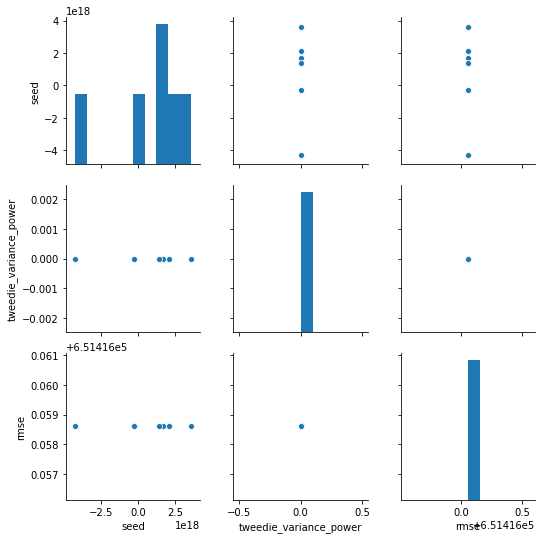

In [113]:
i = dfglm[['Model_Name','fold_assign', 'seed','tweedie_variance_power','rmse']]
sns.pairplot(i)

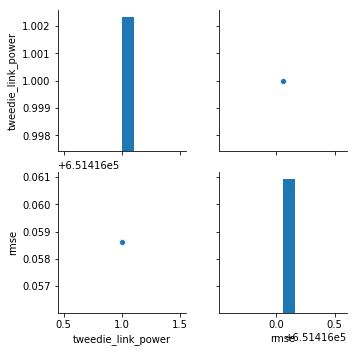

In [114]:
j = dfglm[['tweedie_link_power','alpha', 'lambda1','missing_values_handling','rmse']]
sns.pairplot(j)

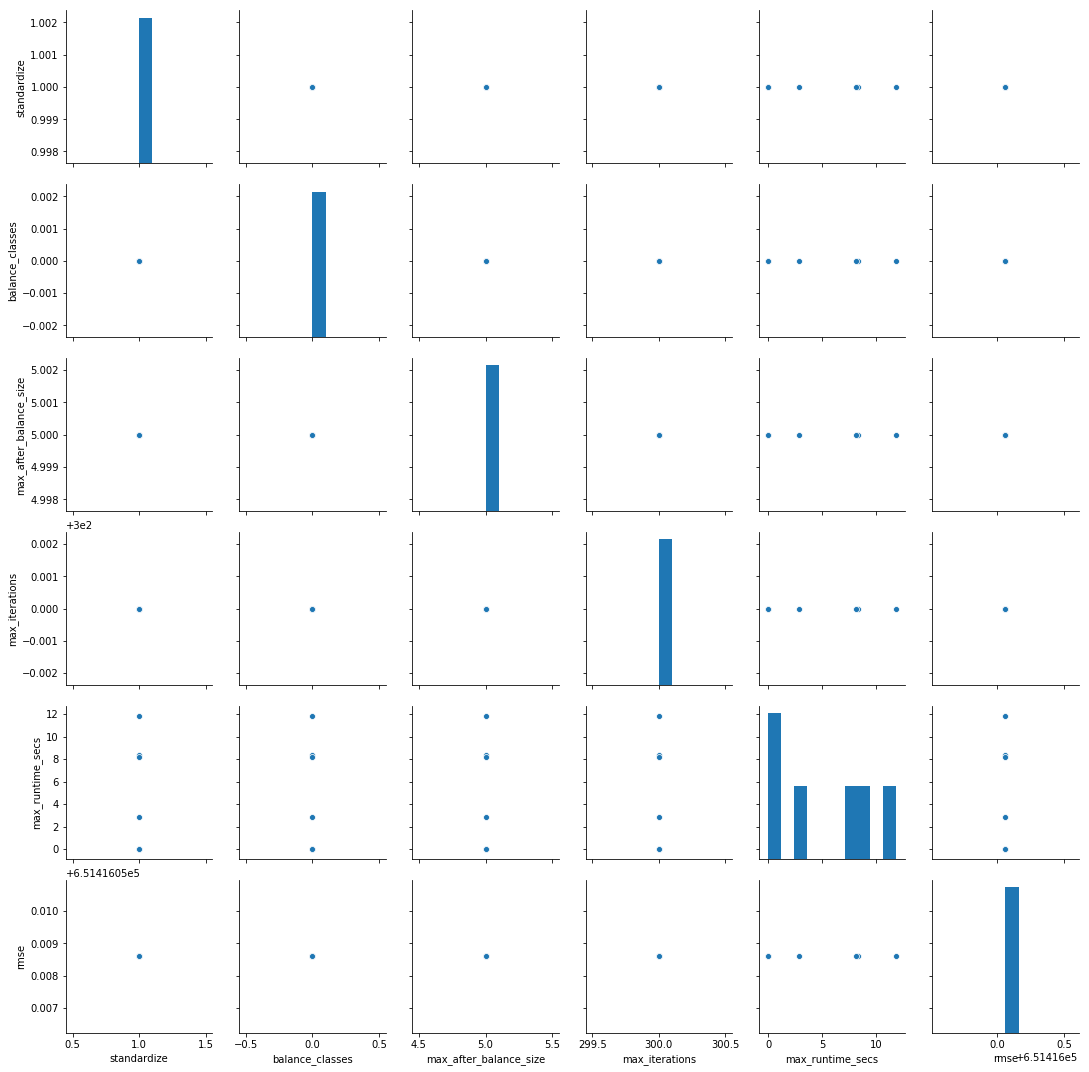

In [115]:
k = dfglm[['standardize','balance_classes', 'max_after_balance_size','max_iterations','max_runtime_secs','rmse']]
sns.pairplot(k)

#### Loading GBM model's hyperparameter values for all runtimes including its metrics

In [96]:
dfgbm = pd.read_csv("GBM_new.csv")

In [97]:
dfgbm

,Model_Name,weights_column,offset_column,fold_column,fold_assessment,stopping_rounds,max_runtime_secs,stopping_metric,stopping_tolerance,balance_classes,...,learn_rate_annealing,col_sample_rate,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,categorical_encoding,rmse
0,GBM_4_AutoML_20190416_233703,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,302758.3971
1,GBM_2_AutoML_20190416_233703,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,303155.8825
2,GBM_3_AutoML_20190416_233703,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,303650.1031
3,GBM_1_AutoML_20190416_233703,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,305788.1130
4,GBM_5_AutoML_20190416_233703,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,311135.0283
5,GBM_grid_1_AutoML_20190416_233703_model_1,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,1.0,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,544272.2022
6,GBM_1_AutoML_20190417_092107,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,302456.7708
7,GBM_grid_1_AutoML_20190417_092107_model_1,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.4,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,302623.4645
8,GBM_1_AutoML_20190417_103626,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,304164.3609
9,GBM_2_AutoML_20190417_092107,NaN,NaN,NaN,Modulo,0,0,deviance,0.007022,False,...,1,0.8,1.7976931348623157e+308,0,gaussian,1.5,0.5,0.9,AUTO,305077.2133


In [139]:
dfgbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 31 columns):
Model_Name                          59 non-null object
fold_assessment                     59 non-null object
stopping_rounds                     59 non-null int64
max_runtime_secs                    59 non-null int64
stopping_metric                     59 non-null object
stopping_tolerance                  59 non-null float64
balance_classes                     59 non-null bool
max_after_balance_size              59 non-null int64
ntrees                              59 non-null int64
max_depth                           59 non-null int64
min_rows                            59 non-null int64
nbins                               59 non-null int64
nbins_top_level                     59 non-null int64
nbins_cats                          59 non-null int64
seed                                59 non-null float64
sample_rate                         59 non-null float64
col_sample_rate_per_tree 

#### Finding the range of hyperparameters for all GBM models

In [140]:
print("fold_assessment :" , set(dfgbm.fold_assessment))
print("stopping_rounds :" , set(dfgbm.stopping_rounds))
print("max_runtime_secs:", set(dfgbm.max_runtime_secs))
print("stopping_metric :",set(dfgbm.stopping_metric))
print("stopping_tolerance :",set(dfgbm.stopping_tolerance))
print("balance_classes :",set(dfgbm.balance_classes))
print("max_after_balance_size :",set(dfgbm.max_after_balance_size))
print("ntrees :",set(dfgbm.ntrees))
print("max_depth :",set(dfgbm.max_depth))   
print("min_rows :",set(dfgbm.min_rows))
print("nbins :",set(dfgbm.nbins))
print("nbins_top_level :",set(dfgbm.nbins_top_level))
print("nbins_cats :",set(dfgbm.nbins_cats))
print("seed :",set(dfgbm.seed))
print("sample_rate :",set(dfgbm.sample_rate))
print("col_sample_rate_per_tree :",set(dfgbm.col_sample_rate_per_tree))
print("col_sample_rate_change_per_level :",set(dfgbm.col_sample_rate_change_per_level))
print("min_split_improvement :",set(dfgbm.min_split_improvement))
print("histogram_type :",set(dfgbm.histogram_type))
print("learn_rate :",set(dfgbm.learn_rate))
print("learn_rate_annealing :",set(dfgbm.learn_rate_annealing))
print("col_sample_rate :",set(dfgbm.col_sample_rate))
print("max_abs_leafnode_pred :",set(dfgbm.max_abs_leafnode_pred))
print("pred_noise_bandwidth :",set(dfgbm.pred_noise_bandwidth))
print("distribution :",set(dfgbm.distribution))
print("tweedie_power :",set(dfgbm.tweedie_power))
print("quantile_alpha :",set(dfgbm.quantile_alpha))
print("huber_alpha :",set(dfgbm.huber_alpha))
print("categorical_encoding :",set(dfgbm.categorical_encoding))

fold_assessment : {'Modulo'}
stopping_rounds : {0}
max_runtime_secs: {0}
stopping_metric : {'deviance'}
stopping_tolerance : {0.007021565}
balance_classes : {False}
max_after_balance_size : {5}
ntrees : {1283, 139, 398, 30, 33, 417, 163, 167, 39, 42, 560, 58, 61, 318, 62, 64, 63, 1217, 323, 578, 71, 1228, 77, 81, 82, 596, 361, 105, 495, 510, 1279}
max_depth : {3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17}
min_rows : {1, 100, 5, 10, 15, 30}
nbins : {20}
nbins_top_level : {1024}
nbins_cats : {1024}
seed : {-1.72e+18, 3.08e+18, 5.24e+18, 7.37e+18, 3.17e+18, 4.08e+18, 7.12e+18, 6.39e+18, 5.33e+18, -1.59e+18, -8.69e+17, 4.49e+18, -1.66e+18, 4.61e+18, 6.04e+18, 2.73e+18, 9.07e+18, 6.41e+18, 7.05e+18, 3.62e+18, 3.6e+18, -2.41e+18, 2.15e+18, 3.77e+18, 3.39e+18, 3.61e+18, -4.96e+17, -8.35e+18, -8.33e+18, -5.32e+18, 9.52e+17, -2.74e+18, -8.41e+18, -5.33e+18, -2.89e+18}
sample_rate : {0.8, 0.9, 0.6, 1.0, 0.7, 0.5}
col_sample_rate_per_tree : {0.8, 0.7, 1.0, 0.4}
col_sample_rate_change_per_level : {

In [99]:
dfgbm.isnull().sum()

Model_Name                           0
weights_column                      59
offset_column                       59
fold_column                         59
fold_assessment                      0
stopping_rounds                      0
max_runtime_secs                     0
stopping_metric                      0
stopping_tolerance                   0
balance_classes                      0
class_sampling_factors              59
max_after_balance_size               0
ntrees                               0
max_depth                            0
min_rows                             0
nbins                                0
nbins_top_level                      0
nbins_cats                           0
seed                                 0
sample_rate                          0
sample_rate_per_class               59
col_sample_rate_per_tree             0
col_sample_rate_change_per_level     0
min_split_improvement                0
histogram_type                       0
learn_rate               

#### Dropping the columns having all null values 

In [100]:
dfgbm = dfgbm.drop(columns=['weights_column','offset_column','fold_column','class_sampling_factors','sample_rate_per_class'])

In [101]:
dfgbm.isnull().sum()

Model_Name                          0
fold_assessment                     0
stopping_rounds                     0
max_runtime_secs                    0
stopping_metric                     0
stopping_tolerance                  0
balance_classes                     0
max_after_balance_size              0
ntrees                              0
max_depth                           0
min_rows                            0
nbins                               0
nbins_top_level                     0
nbins_cats                          0
seed                                0
sample_rate                         0
col_sample_rate_per_tree            0
col_sample_rate_change_per_level    0
min_split_improvement               0
histogram_type                      0
learn_rate                          0
learn_rate_annealing                0
col_sample_rate                     0
max_abs_leafnode_pred               0
pred_noise_bandwidth                0
distribution                        0
tweedie_powe

#### ScatterPlot for the hyperparameters versus metric

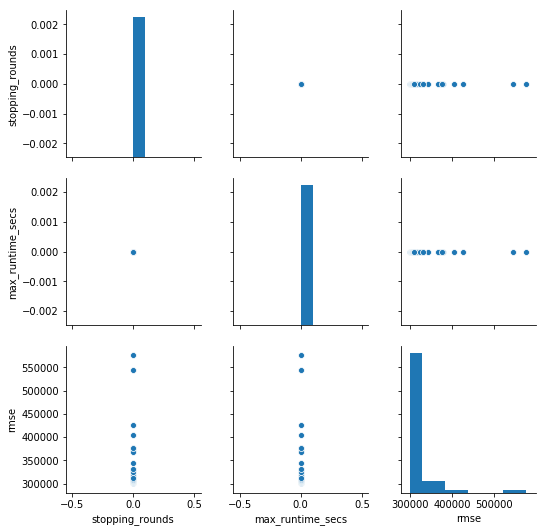

In [116]:
l = dfgbm[['Model_Name','fold_assessment', 'stopping_rounds','max_runtime_secs','rmse']]
sns.pairplot(l)

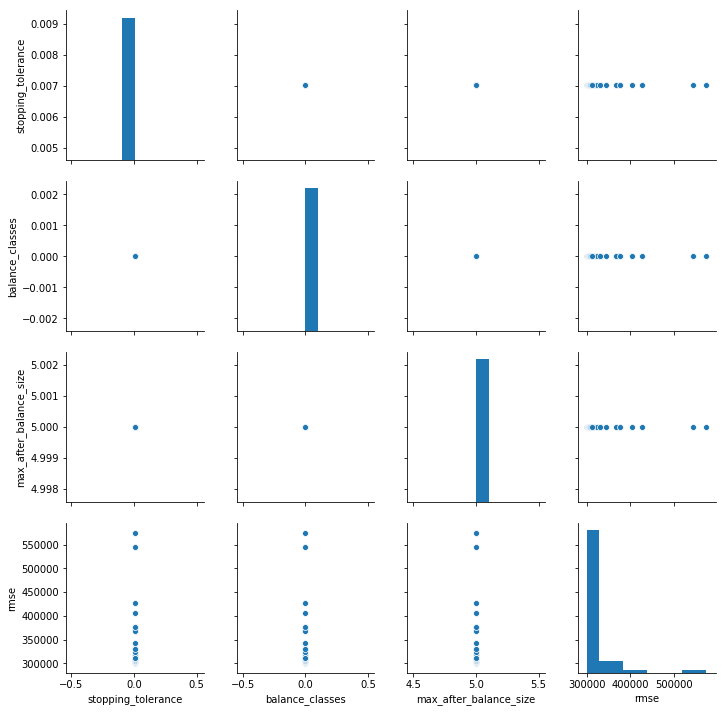

In [117]:
m = dfgbm[['stopping_metric','stopping_tolerance', 'balance_classes','max_after_balance_size','rmse']]
sns.pairplot(m)

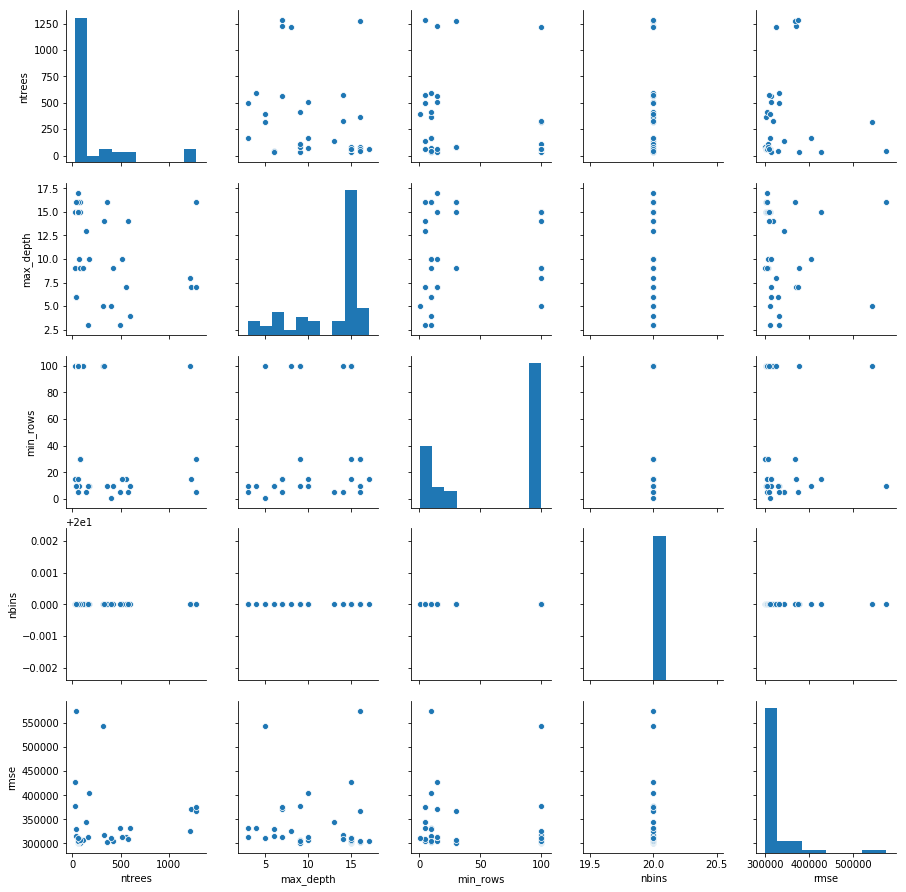

In [118]:
n = dfgbm[['ntrees','max_depth', 'min_rows','nbins','rmse']]
sns.pairplot(n)

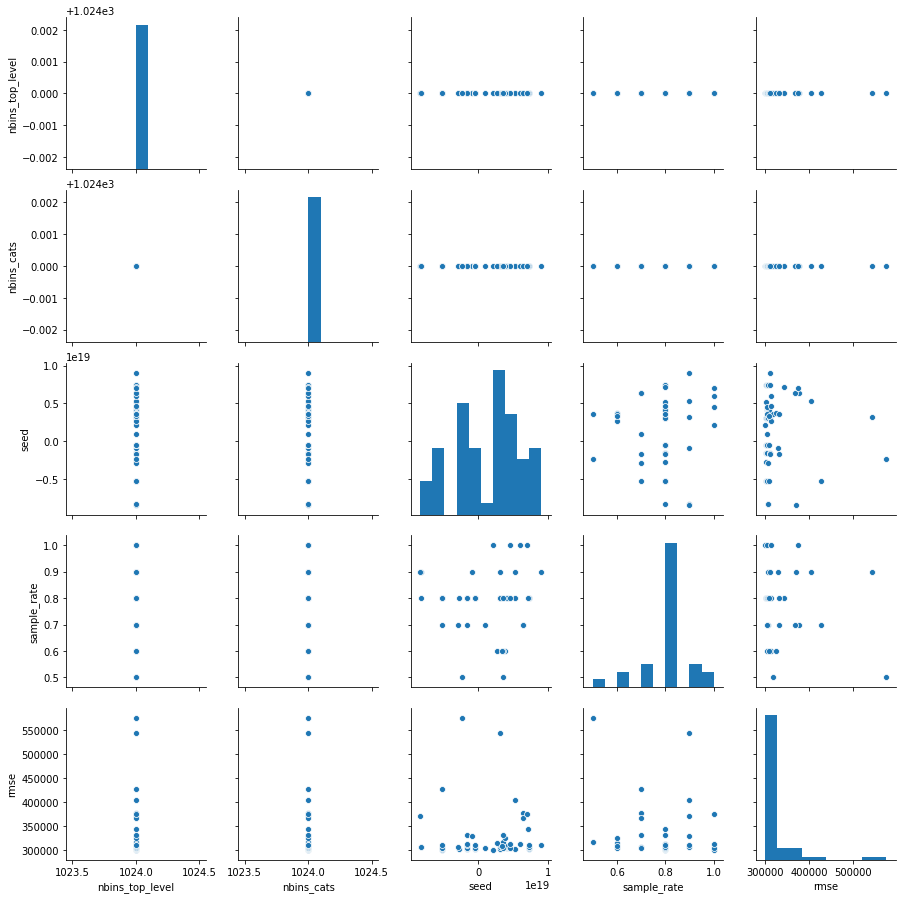

In [119]:
o = dfgbm[['nbins_top_level','nbins_cats', 'seed','sample_rate','rmse']]
sns.pairplot(o)

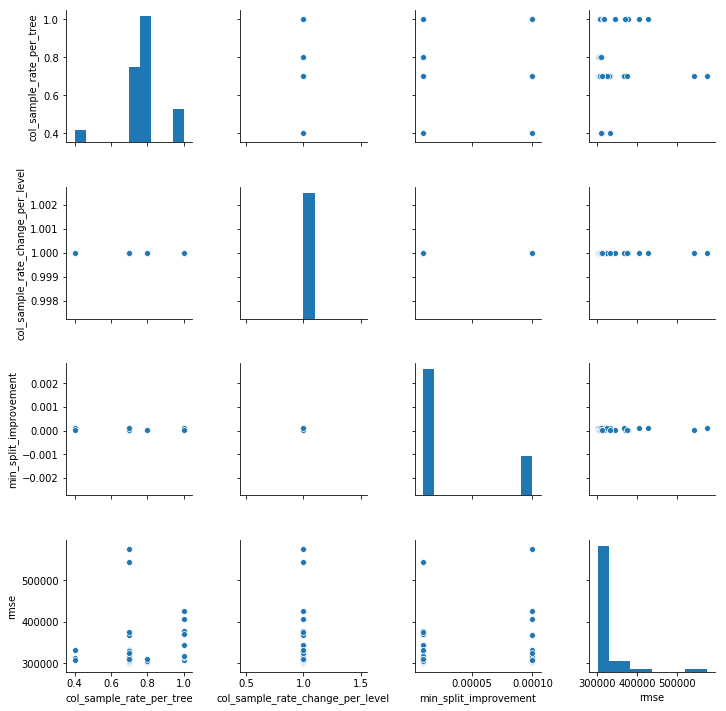

In [120]:
p = dfgbm[['col_sample_rate_per_tree','col_sample_rate_change_per_level', 'min_split_improvement','histogram_type','rmse']]
sns.pairplot(p)

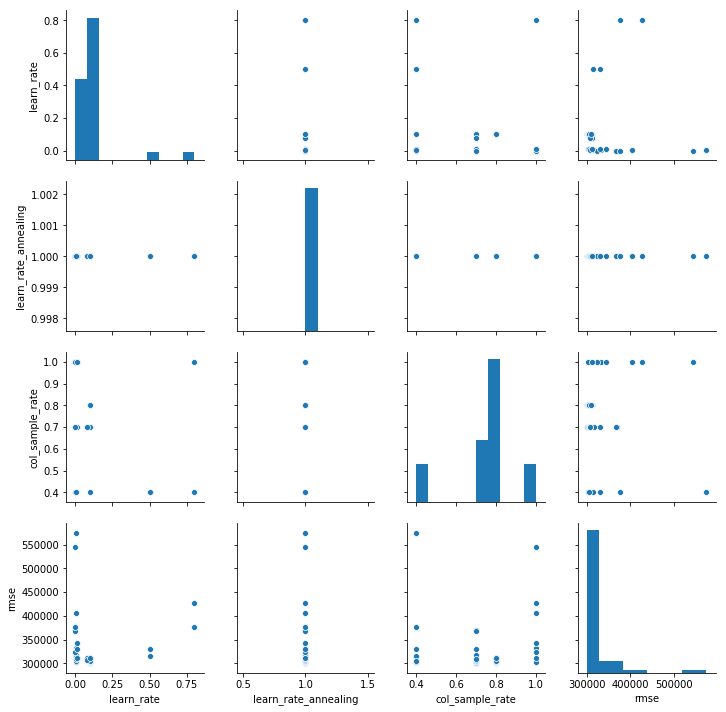

In [121]:
q = dfgbm[['learn_rate','learn_rate_annealing', 'col_sample_rate','rmse']]
sns.pairplot(q)

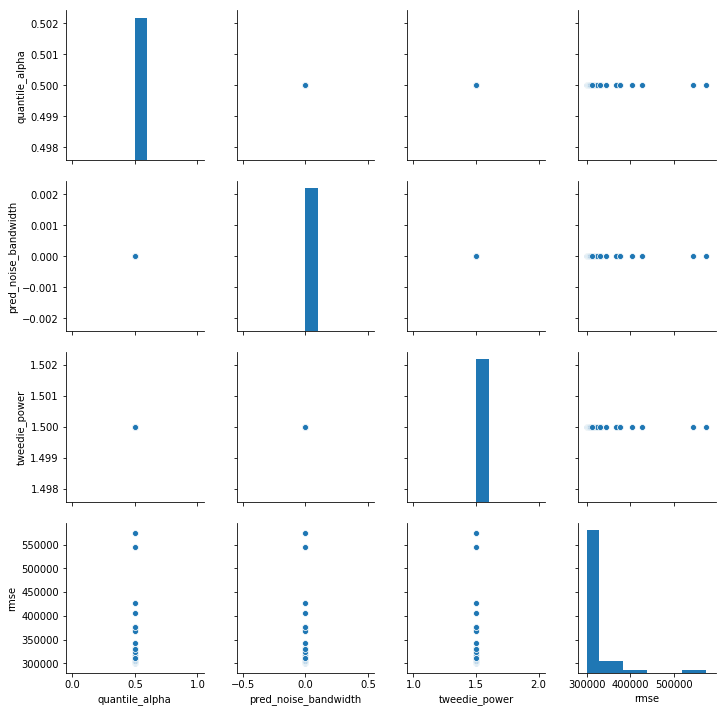

In [122]:
r = dfgbm[['quantile_alpha','pred_noise_bandwidth', 'distribution', 'tweedie_power','rmse']]
sns.pairplot(r)

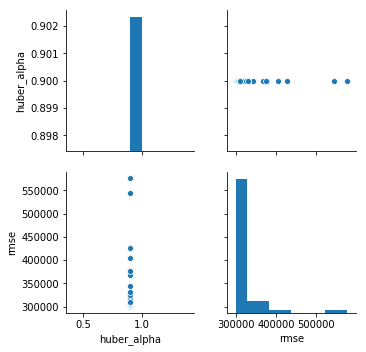

In [123]:
s = dfgbm[['huber_alpha', 'categorical_encoding','rmse']]
sns.pairplot(s)

#### Initializing H2O

In [154]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(max_mem_size='5G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from C:\Users\venu0\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\venu0\AppData\Local\Temp\tmp_5ab6xlo
  JVM stdout: C:\Users\venu0\AppData\Local\Temp\tmp_5ab6xlo\h2o_venu0_started_from_python.out
  JVM stderr: C:\Users\venu0\AppData\Local\Temp\tmp_5ab6xlo\h2o_venu0_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,1 month and 12 days
H2O cluster name:,H2O_from_python_venu0_hzuvn2
H2O cluster total nodes:,1
H2O cluster free memory:,4.445 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


#### Converting pandas dataframe to H2Oframe

In [155]:
train1 = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


#### Splitting the data into test and train

In [157]:
train,test = train1.split_frame(ratios=[0.7],seed=123)

In [145]:
x = ["Suburb","Address","Rooms","Type","Method","SellerG","Date","Distance","Postcode","Bathroom","Car","Landsize","BuildingArea","YearBuilt","CouncilArea","Lattitude","Longtitude","Regionname","Propertycount"]
y = "Price"

#### Running GridSearch for DRF model with the range of hyperparameters obtained

In [158]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [161]:
drf_params1 = {'ntrees' : [35, 50, 43],
'stopping_metric' : ['deviance', 'AUTO']}

# Train and validate a cartesian grid of drfs
drf_grid1 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='drf_grid1',
                          hyper_params=drf_params1)
drf_grid1.train(x=x, y=y,
                training_frame=train)

# Get the grid results, sorted by validation rmse
drf_gridperf1 = drf_grid1.get_grid(sort_by='rmse')

# Grab the top drf model, chosen by validation rmse
best_drf1 = drf_gridperf1.models[0]
drf_grid1.show()

drf Grid Build progress: |████████████████████████████████████████████████| 100%
     balance_classes categorical_encoding col_sample_rate_change_per_level  \
0              false                 AUTO                              1.0   
1              false                 AUTO                              1.0   
2              false                 AUTO                              1.0   
3              false                 AUTO                              1.0   
4              false                 AUTO                              1.0   
5              false                 AUTO                              1.0   
6              false                 AUTO                              1.0   
7              false                 AUTO                              1.0   
8              false                 AUTO                              1.0   
9              false                 AUTO                              1.0   
10             false                 AUTO                    

In [162]:
drf_gridperf1

     balance_classes categorical_encoding col_sample_rate_change_per_level  \
0              false                 AUTO                              1.0   
1              false                 AUTO                              1.0   
2              false                 AUTO                              1.0   
3              false                 AUTO                              1.0   
4              false                 AUTO                              1.0   
5              false                 AUTO                              1.0   
6              false                 AUTO                              1.0   
7              false                 AUTO                              1.0   
8              false                 AUTO                              1.0   
9              false                 AUTO                              1.0   
10             false                 AUTO                              1.0   
11             false                 AUTO                       

From above we can infer that the value of rmse keep on decreasing for parameters 'ntrees','stopping_metric' as their value getting tuned which implies the model depend upon this hyperparameters.

From our data-frame and Graph we can say that Hyperparameters like ntrees, stopping_metric changes as H2O process multiple DRF model to get better evaluation matric value. For every iteration this values get changed and perhaps get tuned to give better result as other didnt changed and kept to default. 
From our analysis this are the best hyperparameters for DRF models

#### Running GridSearch for XRT model with the range of hyperparameters obtained

In [166]:
xrt_params1 = {'ntrees' : [35, 50, 43],
'histogram_type' : ['Random']}

# Train and validate a cartesian grid of xrts
xrt_grid1 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='xrt_grid1',
                          hyper_params=xrt_params1)
xrt_grid1.train(x=x, y=y,
                training_frame=train)

# Get the grid results, sorted by validation rmse
xrt_gridperf1 = xrt_grid1.get_grid(sort_by='rmse')

# Grab the top xrt model, chosen by validation rmse
best_xrt1 = xrt_gridperf1.models[0]
xrt_grid1.show()

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    histogram_type ntrees          model_ids      residual_deviance
0           Random     50  xrt_grid1_model_5  1.0861445193660648E11
1           Random     50  xrt_grid1_model_2  1.1118770785151309E11
2           Random     43  xrt_grid1_model_3  1.1151543722371431E11
3           Random     35  xrt_grid1_model_4  1.1213939698060626E11
4           Random     43  xrt_grid1_model_6   1.122294753202977E11
5           Random     35  xrt_grid1_model_1  1.1800744939286983E11


From above we can infer that the value of rmse keep on decreasing for parameters 'ntrees','histogram_type' as their value getting tuned which implies the model depend upon this hyperparameters.

From our data-frame and Graph we can say that Hyperparameters like ntrees, histogram_type changes as H2O process multiple XRT model to get better evaluation matric value. For every iteration this values get changed and perhaps get tuned to give better result as other didnt changed and kept to default. 
From our analysis this are the best hyperparameters for XRT models

#### Running GridSearch for GLM model with the range of hyperparameters obtained

In [169]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [175]:
glm_params1 = {'alpha' : [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
'lambda' : [28044084.4220047, 17415851.54590214, 10815538.867473572, 6716632.872387761, 4171142.806218582]}

# Train and validate a cartesian grid of glms
glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=glm_params1)
glm_grid1.train(x=x, y=y,
                training_frame=train)

# Get the grid results, sorted by validation rmse
glm_gridperf1 = glm_grid1.get_grid(sort_by='rmse')

# Grab the top glm model, chosen by validation rmse
best_glm1 = glm_gridperf1.models[0]
glm_grid1.show()

glm Grid Build progress: |████████████████████████████████████████████████| 100%
        alpha                  lambda        max_runtime_secs  \
0       [0.0]     [4171142.806218582]  1.7976931348623157E308   
1       [0.0]     [4171142.806218582]                11.83333   
2       [0.0]     [4171142.806218582]                 8.33333   
3       [0.0]     [4171142.806218582]                 8.16666   
4       [0.0]     [4171142.806218582]                 2.83333   
5       [0.0]     [6716632.872387761]                11.83333   
6       [0.0]     [6716632.872387761]                 8.16666   
7       [0.0]     [6716632.872387761]                 8.33333   
8       [0.0]     [6716632.872387761]                 2.83333   
9       [0.0]     [6716632.872387761]  1.7976931348623157E308   
10      [0.0]  [1.0815538867473572E7]                 8.16666   
11      [0.0]  [1.0815538867473572E7]                 8.33333   
12      [0.0]  [1.0815538867473572E7]  1.7976931348623157E308   
13      [

From above we can infer that the value of rmse keep on decreasing for parameters 'alpha','lambda' as their value getting tuned which implies the model depend upon this hyperparameters.

From our data-frame and Graph we can say that Hyperparameters like alpha, lambda changes as H2O process multiple GLM model to get better evaluation matric value. For every iteration this values get changed and perhaps get tuned to give better result as other didnt changed and kept to default. 
From our analysis this are the best hyperparameters for GLM models

In [ ]:
gbm_params1 = {'min_rows' : [1, 100, 5, 10, 15, 30],
'ntrees' : [1283, 139, 398, 30, 33, 417, 163, 167, 39, 42, 560, 58, 61, 318, 62, 64, 63, 1217, 323, 578, 71, 1228, 77, 81, 82, 596, 361, 105, 495, 510, 1279],
'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17],
'sample_rate' : [0.8, 0.9, 0.6, 1.0, 0.7, 0.5],
'col_sample_rate_per_tree' : [0.8, 0.7, 1.0, 0.4],
'min_split_improvement' : [1e-05, 0.0001],
'learn_rate' : [0.1, 0.08, 0.8, 0.5, 0.01, 0.008, 0.005, 0.001],
'col_sample_rate' : [0.8, 1.0, 0.7, 0.4]}

# Train and validate a cartesian grid of gbms
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(x=x, y=y,
                training_frame=train)

# Get the grid results, sorted by validation rmse
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='rmse')

# Grab the top gbm model, chosen by validation rmse
best_gbm1 = gbm_gridperf1.models[0]
gbm_grid1.show()

# Conclusion 

Inorder to find the best hyperparameter,we run the H2O AutoML for different runtimes. H2O AutoML not only provides best model for dataset but also provide list's of information like Evaluation Metrics, parameters and hyperparameters of each model. We ran H2O AutoML for 5 different runtimes and we compared the values of their Hyperparameters and analysed the range across models for all 5 runtimes.We have compared the hyperparamerers with the metrics inorder to check which particular hyperparameter is haveing a large effecton the metric.We have plotted plots to visuvalize the same. We have analyzed the best hyperparameters for each model which are effecting the model's outcome.

For our dataset the The GBM model worked very well with a good RMSE rate of 300602.2988 at a runtime of 1300 seconds.The most important hyperparameters are ntrees ,max_depth  ,sample_rate ,col_sample_rate_per_tree ,min_split_improvement ,learn_rate ,col_sample_rate. We have also observed that most of the models performed well with the increase in runtime



# Contributions

In above analysis:

1. 70% of explanation, analysis and code is done by us.
2. 20% of resource is from web and citations are given below.
3. 10% of resource is from prof. Nik Brown notes.

# Citations

https://github.com/prabhuSub/Hyperparamter-Samples/tree/master/Hyperparameter_Generated


https://github.com/nikbearbrown/CSYE_7245/blob/master/Assignments/Assignment_1_Properly_Format_and_Explain.ipynb


https://www.kaggle.com/chandraroy/plotting-with-pandas-matplotlib-and-seaborn

# License

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png
https://i.creativecommons.org/l/by/3.0/us/88x31.png
" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>

 Copyright 2019 Venu Gopal Reddy,Nikhitha Sindhiya

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.